### Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [2]:
data = pd.read_csv('dataset/dataset.csv')
data

,provinsi,kabupaten,tahun,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,ACEH,Simeulue,2023,68.06,65.655,9.760,14.28,7686.0
1,ACEH,Aceh Singkil,2023,70.14,67.830,8.655,14.35,9374.0
2,ACEH,Aceh Selatan,2023,68.44,64.860,8.840,14.70,8712.0
3,ACEH,Aceh Tenggara,2023,71.05,68.700,10.100,14.27,8566.0
4,ACEH,Aceh Timur,2023,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...,...,...,...
7191,PAPUA,Puncak,2010,33.44,64.915,0.710,2.84,4752.0
7192,PAPUA,Dogiyai,2010,47.48,64.160,3.360,7.85,4769.0
7193,PAPUA,Intan Jaya,2010,NaN,NaN,NaN,4.12,NaN
7194,PAPUA,Deiyai,2010,NaN,NaN,NaN,9.06,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7196 entries, 0 to 7195
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   provinsi                    7196 non-null   object 
 1   kabupaten                   7196 non-null   object 
 2   tahun                       7196 non-null   int64  
 3   indeks_pembangunan_manusia  7129 non-null   float64
 4   angka_harapan_hidup         6614 non-null   float64
 5   rerata_lama_sekolah         6614 non-null   float64
 6   harapan_lama_sekolah        6799 non-null   float64
 7   pengeluaran_per_kapita      7129 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 449.9+ KB


In [4]:
data.describe(include=object)

,provinsi,kabupaten
count,7196,7196
unique,34,514
top,JAWA TIMUR,Kota Jayapura
freq,532,14


In [5]:
data.describe()

,tahun,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
count,7196.000000,7129.000000,6614.000000,6614.000000,6799.000000,7129.000000
mean,2016.500000,67.859839,68.996626,7.981120,12.485158,9789.504278
std,4.031409,7.070305,3.665020,1.722349,1.509673,2688.739256
min,2010.000000,19.620000,52.600000,0.250000,1.220000,3214.000000
25%,2013.000000,64.180000,66.766250,6.986250,11.790000,7963.000000
50%,2016.500000,67.790000,69.285000,7.875000,12.530000,9586.000000
75%,2020.000000,71.720000,71.453750,8.985000,13.275000,11242.000000
max,2023.000000,88.280000,78.010000,13.005000,17.930000,24975.000000


### Preprocessinng Data

##### Seleksi Fitur

In [6]:
data = data.drop(columns= ['provinsi', 'kabupaten', 'tahun'])
data

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,68.06,65.655,9.760,14.28,7686.0
1,70.14,67.830,8.655,14.35,9374.0
2,68.44,64.860,8.840,14.70,8712.0
3,71.05,68.700,10.100,14.27,8566.0
4,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...
7191,33.44,64.915,0.710,2.84,4752.0
7192,47.48,64.160,3.360,7.85,4769.0
7193,NaN,NaN,NaN,4.12,NaN
7194,NaN,NaN,NaN,9.06,NaN


##### Menghapus Missing Value

In [7]:
data.isna().sum()

indeks_pembangunan_manusia     67
angka_harapan_hidup           582
rerata_lama_sekolah           582
harapan_lama_sekolah          397
pengeluaran_per_kapita         67
dtype: int64

In [8]:
data= data.dropna()
data

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,68.06,65.655,9.760,14.28,7686.0
1,70.14,67.830,8.655,14.35,9374.0
2,68.44,64.860,8.840,14.70,8712.0
3,71.05,68.700,10.100,14.27,8566.0
4,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...
7189,39.37,62.175,2.050,5.76,3844.0
7190,38.47,64.590,1.365,5.22,4016.0
7191,33.44,64.915,0.710,2.84,4752.0
7192,47.48,64.160,3.360,7.85,4769.0


In [9]:
data.isna().sum()

indeks_pembangunan_manusia    0
angka_harapan_hidup           0
rerata_lama_sekolah           0
harapan_lama_sekolah          0
pengeluaran_per_kapita        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6274 entries, 0 to 7195
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   indeks_pembangunan_manusia  6274 non-null   float64
 1   angka_harapan_hidup         6274 non-null   float64
 2   rerata_lama_sekolah         6274 non-null   float64
 3   harapan_lama_sekolah        6274 non-null   float64
 4   pengeluaran_per_kapita      6274 non-null   float64
dtypes: float64(5)
memory usage: 294.1 KB


##### Visualisasi Data

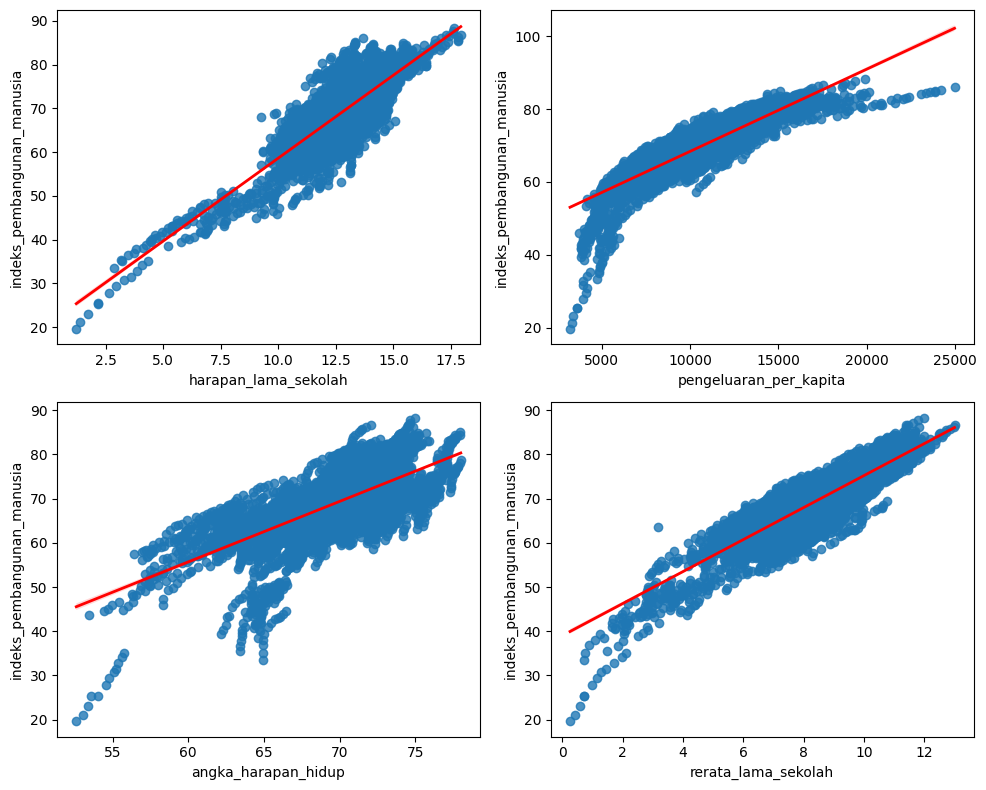

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.regplot(x='harapan_lama_sekolah', y='indeks_pembangunan_manusia', data=data, ax=axes[0,0], line_kws={'color': 'red', 'linewidth': 2})
sns.regplot(x='pengeluaran_per_kapita', y='indeks_pembangunan_manusia', data=data, ax=axes[0,1], line_kws={'color': 'red', 'linewidth': 2})
sns.regplot(x='angka_harapan_hidup', y='indeks_pembangunan_manusia', data=data, ax=axes[1,0], line_kws={'color': 'red', 'linewidth': 2})
sns.regplot(x='rerata_lama_sekolah', y='indeks_pembangunan_manusia', data=data, ax=axes[1,1], line_kws={'color': 'red', 'linewidth': 2})
plt.tight_layout()
plt.show()

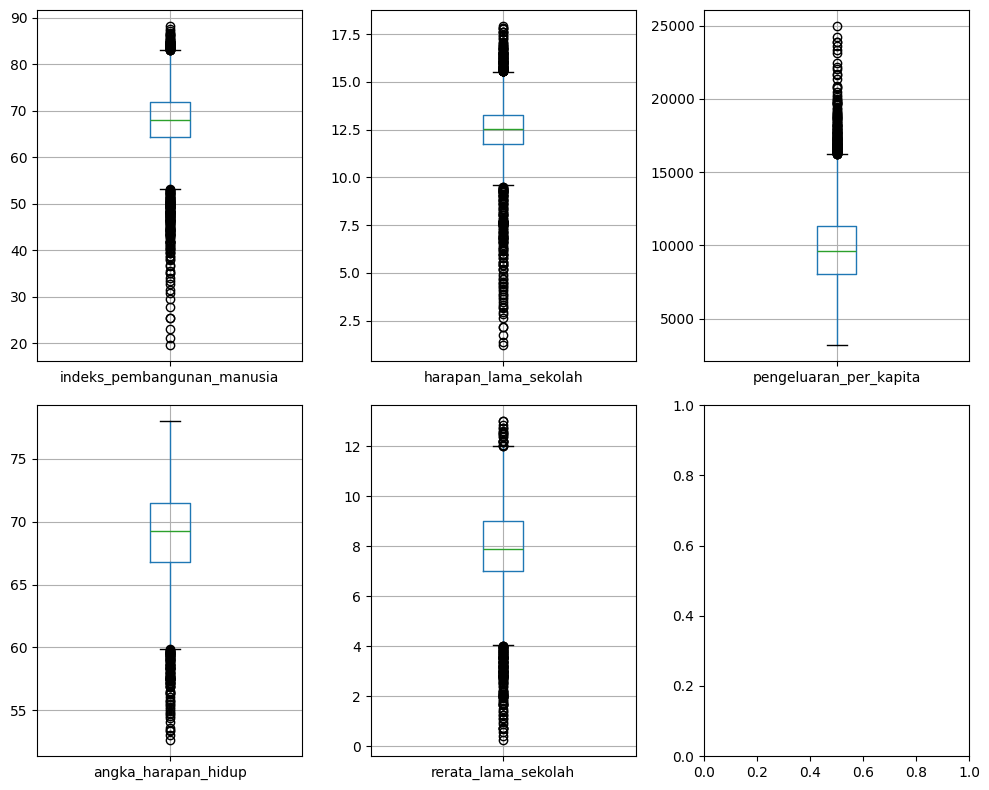

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
data.boxplot(column=["indeks_pembangunan_manusia"], ax=axes[0, 0])
data.boxplot(column=["harapan_lama_sekolah"], ax=axes[0, 1])
data.boxplot(column=["pengeluaran_per_kapita"], ax=axes[0, 2])
data.boxplot(column=["angka_harapan_hidup"], ax=axes[1, 0])
data.boxplot(column=["rerata_lama_sekolah"], ax=axes[1, 1])
plt.tight_layout()
plt.show()

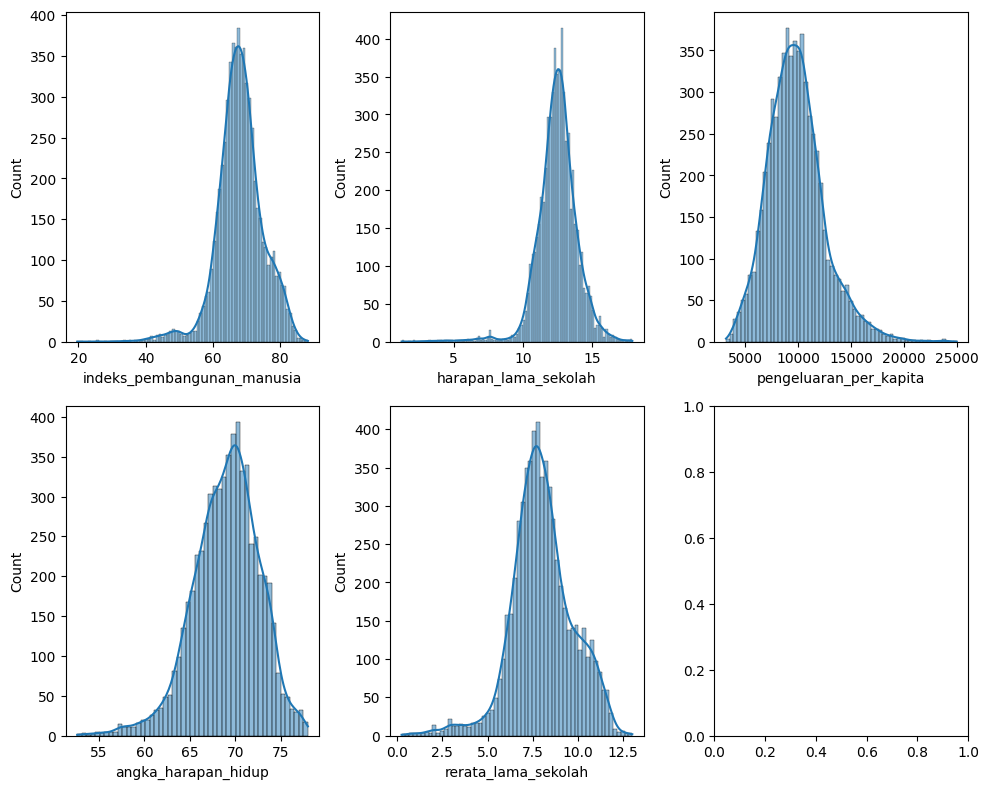

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
sns.histplot(data["indeks_pembangunan_manusia"], kde=True, ax=axes[0, 0])
sns.histplot(data["harapan_lama_sekolah"], kde=True, ax=axes[0, 1])
sns.histplot(data["pengeluaran_per_kapita"], kde=True, ax=axes[0, 2])
sns.histplot(data["angka_harapan_hidup"], kde=True, ax=axes[1, 0])
sns.histplot(data["rerata_lama_sekolah"], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

##### Korelasi Fitur

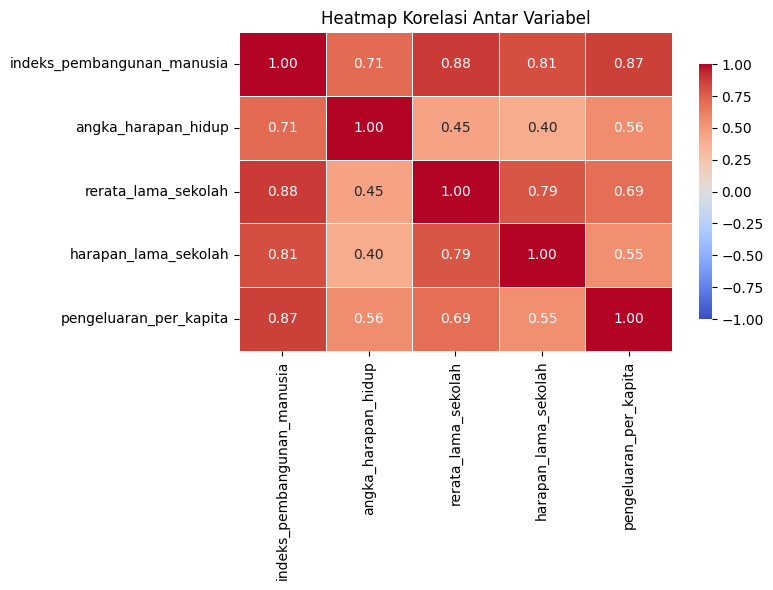

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

##### Normalisasi Data

In [15]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
df_data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
joblib.dump(scaler, 'minmax_scaler_model.pkl')

['minmax_scaler_model.pkl']

In [16]:
data_normalized

array([[0.70550539, 0.5137741 , 0.74558996, 0.78156792, 0.20550526],
       [0.73579959, 0.59937033, 0.65895727, 0.78575703, 0.28307523],
       [0.71103991, 0.48248721, 0.67346139, 0.80670257, 0.25265383],
       ...,
       [0.20128168, 0.48465171, 0.03606429, 0.09694794, 0.0706769 ],
       [0.40576755, 0.454939  , 0.24382595, 0.3967684 , 0.07145811],
       [0.8311972 , 0.67827627, 0.81575853, 0.7432675 , 0.49119985]])

In [17]:
df_data_normalized

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,0.705505,0.513774,0.745590,0.781568,0.205505
1,0.735800,0.599370,0.658957,0.785757,0.283075
2,0.711040,0.482487,0.673461,0.806703,0.252654
3,0.749053,0.633609,0.772246,0.780969,0.245945
4,0.723857,0.650138,0.646021,0.709156,0.285924
...,...,...,...,...,...
6269,0.287649,0.376820,0.141121,0.271694,0.028951
6270,0.274541,0.471861,0.087417,0.239378,0.036855
6271,0.201282,0.484652,0.036064,0.096948,0.070677
6272,0.405768,0.454939,0.243826,0.396768,0.071458


In [18]:
df_data_normalized.describe()

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
count,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000
mean,0.704888,0.646506,0.608850,0.673890,0.304775
std,0.102456,0.142960,0.134414,0.090525,0.123991
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.651762,0.559671,0.531164,0.631358,0.221015
50%,0.703903,0.657222,0.600353,0.676840,0.295368
75%,0.760851,0.742178,0.687181,0.721724,0.371927
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_data_normalized.to_csv('dataset/dataset_normalized.csv', index=False)